In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
#!pip install wordcloud
from wordcloud import WordCloud
import spacy

nlp = spacy.load("en_core_web_sm")

# Loading Spam_Ham_Dataset

In [ ]:
df=pd.read_csv(r"/content/spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# Splitting Subject and Text

In [ ]:
email_subjects=[]
email_text=[]
def split_subject(text):
    global email_subjects
    global email_text
    subject=""
    for ch in text:
        if(ch=='\r'):
            break
        subject+=ch

    email_subjects.append(subject)
    email_text.append(text.replace(subject,""))


In [ ]:
df["text"]=df["text"].str.replace("Subject:","")
df.loc[df["label"]=="ham","label"]=0
df.loc[df["label"]=="spam","label"]=1
df["text"].apply(split_subject)
df["subject"]=email_subjects
df["text"]=email_text
df.head()

,Unnamed: 0,label,text,label_num,subject
0,605,0,\r\nthis is a follow up to the note i gave you...,0,enron methanol ; meter # : 988291
1,2349,0,\r\n( see attached file : hplnol 09 . xls )\r\...,0,"hpl nom for january 9 , 2001"
2,3624,0,"\r\nho ho ho , we ' re around to that most won...",0,neon retreat
3,4685,1,\r\nabasements darer prudently fortuitous unde...,1,"photoshop , windows , office . cheap . main t..."
4,2030,0,\r\nthis deal is to book the teco pvr revenue ...,0,re : indian springs


In [ ]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df
df=df.drop(df.columns[0], axis=1)
df=df.drop('label_num', axis=1)
df=swap_columns(df, 'label', 'subject')
df

,subject,text,label
0,enron methanol ; meter # : 988291,\r\nthis is a follow up to the note i gave you...,0
1,"hpl nom for january 9 , 2001",\r\n( see attached file : hplnol 09 . xls )\r\...,0
2,neon retreat,"\r\nho ho ho , we ' re around to that most won...",0
3,"photoshop , windows , office . cheap . main t...",\r\nabasements darer prudently fortuitous unde...,1
4,re : indian springs,\r\nthis deal is to book the teco pvr revenue ...,0
...,...,...,...
5166,put the 10 on the ft,\r\nthe transport volumes decreased from 25000...,0
5167,3 / 4 / 2000 and following noms,\r\nhpl can ' t take the extra 15 mmcf / d ove...,0
5168,calpine daily gas nomination,"\r\n>\r\n>\r\njulie , as i mention earlier we ...",0
5169,industrial worksheets for august 2000 activity,\r\nattached are the worksheets for august 200...,0


# Text Preprocessing

## 1. Lemmatization and Removing Non-ASCII Characters

In [ ]:
import string
import re

def clean_text(s):
    for cs in s:
        if  not cs in string.ascii_letters:
            s = s.replace(cs, ' ')
    return s.rstrip('\r\n')

def remove_little(s):
    wordsList = s.split()
    k_length=2
    resultList = [element for element in wordsList if len(element) > k_length]
    resultString = ' '.join(resultList)
    return resultString

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

df['text'] = df['text'].apply(lambda x: clean_text(x))
df['text'] = df['text'].apply(lambda x: remove_little(x))
df['text'] = df['text'].apply(lambda x: lemmatize_text(x))

df['subject'] = df['subject'].apply(lambda x: clean_text(x))
df['subject'] = df['subject'].apply(lambda x: remove_little(x))
df['subject'] = df['subject'].apply(lambda x: lemmatize_text(x))

df

,subject,text,label
0,enron methanol meter,this follow the note give you monday prelimina...,0
1,hpl nom for january,see attached file hplnol xls hplnol xls,0
2,neon retreat,around that most wonderful time the year neon ...,0
3,photoshop window office cheap main trending,abasement darer prudently fortuitous undergone...,1
4,indian spring,this deal book the teco pvr revenue understand...,0
...,...,...,...
5166,put the the,the transport volume decrease from all should ...,0
5167,and follow nom,hpl can take the extra mmcf over the weekend t...,0
5168,calpine daily gas nomination,julie mention early hope start the unit this a...,0
5169,industrial worksheet for august activity,attach be the worksheet for august activity th...,0


## 2. Removing Stopwords

In [ ]:
from wordcloud import STOPWORDS
more_stopwords = {'re' , 's' , 'subject','hpl','hou','enron'}
STOPWORDS = STOPWORDS.union(more_stopwords)

# Creating WordCloud

## 1. Creating Word Dictionay with Frequency

In [ ]:
dic_all={}
def count_words(s):
    global dic_all
    wordsList = s.split()
    for w in wordsList:
        if not w in dic_all:
             dic_all[w]=1
        else:
             dic_all[w]+=1


## 2. Sorting and Appending dictionary to the Dataset

In [ ]:
dic_all={}
df['subject'].apply(lambda x: count_words(x))
dic_all=sorted(dic_all.items(), key=lambda x:x[1],reverse=True)
df_new=pd.DataFrame(dic_all)
df_new.head(20)

,0,1
0,for,1023
1,hpl,582
2,nom,486
3,meter,359
4,actual,279
5,enron,276
6,and,263
7,nomination,255
8,gas,232
9,the,214


# 3. Printing WordCloud for Spam Emails

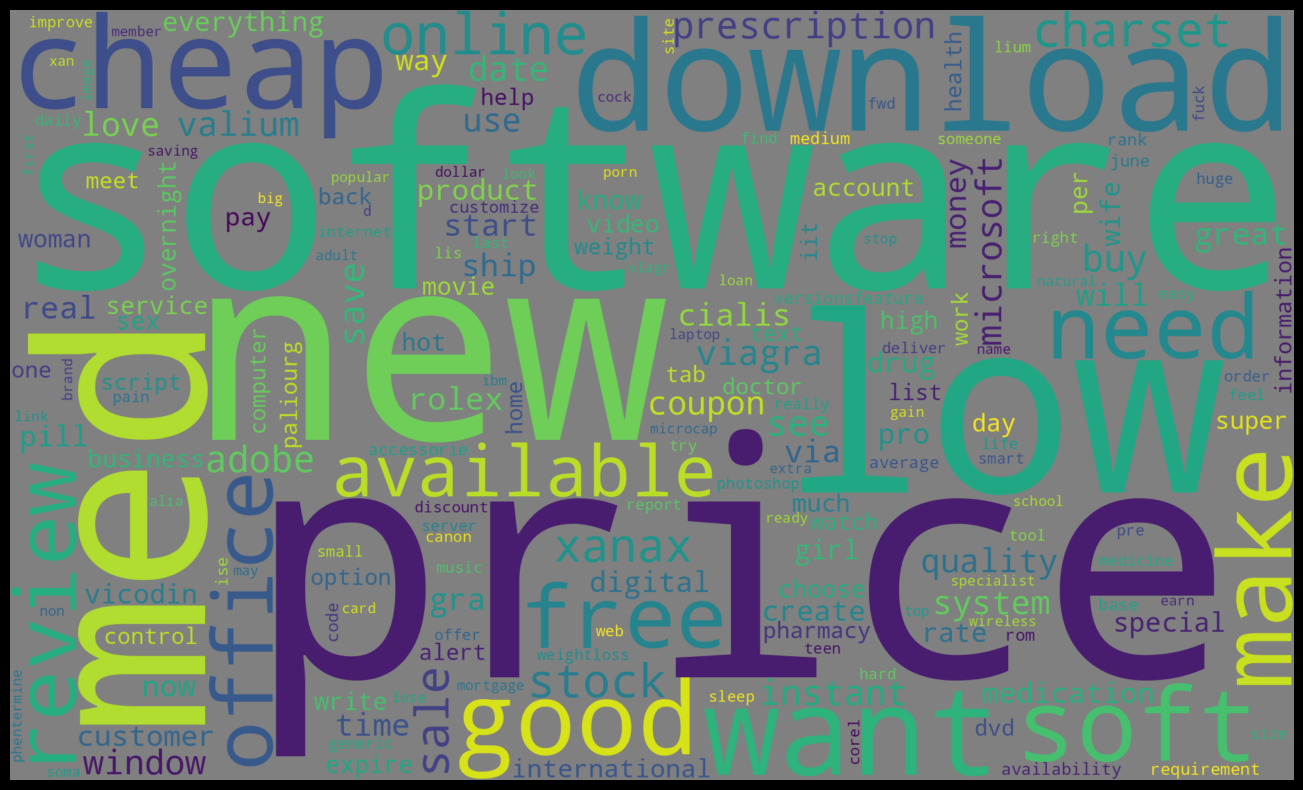

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'gray',stopwords=STOPWORDS
                       ,width=2000, height=1200).generate("".join(df[df['label']==1]["subject"]))
# Display the generated Word Cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. Creating WordCloud for Ham Emails

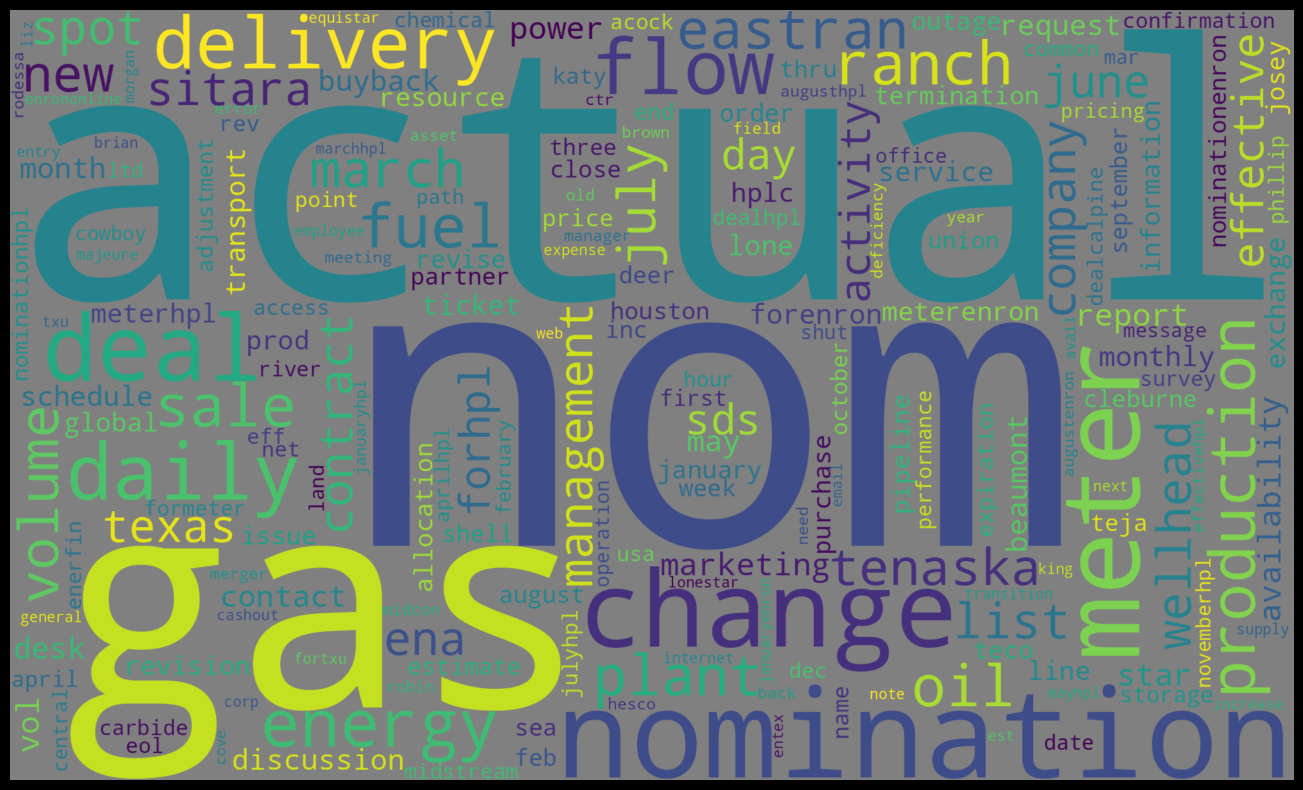

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'gray',stopwords=STOPWORDS
                       ,width=2000, height=1200).generate("".join(df[df['label']==0]["subject"]))
# Display the generated Word Cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Training the Model (MultinomialNB)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report


df['label']=df['label'].astype(str).astype(int)
X_train, X_test , y_train, y_test = train_test_split(df['text'], df['label'] , test_size=0.2)

Vectorizer = CountVectorizer()
count= Vectorizer.fit_transform(X_train.values)

Spam_detection = MultinomialNB()
targets = y_train.values
Spam_detection.fit(count, targets)


MultinomialNB()

y_predict = Spam_detection.predict(Vectorizer.transform(X_test))

accuracy_score(y_test, y_predict)

0.9507246376811594

# Confusion Matrix

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       721
           1       0.96      0.88      0.92       314

    accuracy                           0.95      1035
   macro avg       0.95      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035



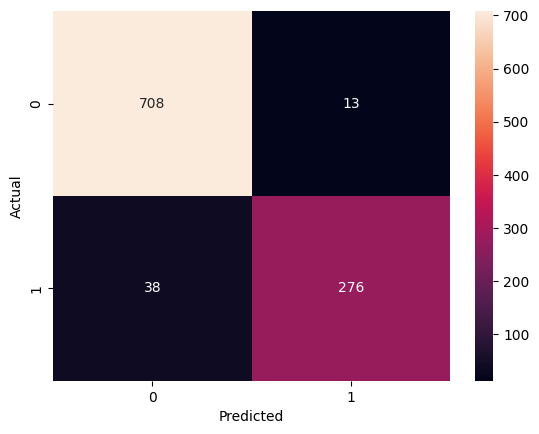

In [ ]:
import seaborn as sns
#create a confusion matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')


#print the classification report
print(classification_report(y_test , y_predict))

# Saving the Model and Count Vectorizer

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
import joblib

joblib.dump(Spam_detection, 'spam_detection_model.pkl')
joblib.dump(Vectorizer, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

# User Entries

In [ ]:
input_email = input("Write the email to check: ")
input_email = lemmatize_text(remove_little(clean_text(input_email)))

prediction = Spam_detection.predict(Vectorizer.transform([input_email]))
if prediction == 1:
    print("Prediction: Spam")
else:
    print("Prediction: Ham")

Write the email to check: verify
Prediction: Ham
